# Processing data -- EDA

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_1 = pd.read_csv("Dec_0_RELIANCE.csv")
data_2 = pd.read_csv("Jan_0_RELIANCE.csv")
data_3 = pd.read_csv("Feb_0_RELIANCE.csv")

In [14]:
data = pd.concat([data_1 , data_2 , data_3])

In [17]:
data['tweet'] = data['Text']

In [20]:
data = data[['Datetime', 'Tweet Id', 'tweet', 'Username', ]]

In [21]:
data.columns

Index(['Datetime', 'Tweet Id', 'tweet', 'Username'], dtype='object')

In [22]:
data.shape

(127253, 4)

In [23]:
data.describe()

,Tweet Id
count,1.272530e+05
mean,1.614399e+18
std,9.261823e+15
min,1.598105e+18
25%,1.606087e+18
50%,1.614914e+18
75%,1.622474e+18
max,1.630357e+18


In [24]:
df = data

In [25]:
df.dropna(subset=['tweet'], inplace=True)
df

,Datetime,Tweet Id,tweet,Username
0,2022-12-30 23:55:21+00:00,1608975056369233920,@AnfieldEdition Performances like this are bec...,Ed11Ram
1,2022-12-30 23:47:51+00:00,1608973168231993344,@KCchemguy @Derek_Wolfe95 ...but in certain si...,Chaz_Mattson
2,2022-12-30 23:47:19+00:00,1608973034144272386,@ettingermentum I think social alienation is l...,ChrisD2003
3,2022-12-30 23:47:12+00:00,1608973004930945026,@LBC @aliciakearns The only vegans I know do i...,CoderScribe
4,2022-12-30 23:42:42+00:00,1608971872636669953,"Time is to love, reliance is to the end. https...",Its_a_BOT
...,...,...,...,...
40407,2023-02-01 00:07:40+00:00,1620574566233051137,Natural Gas - Tight market expected \n\nRelian...,_Sandeep09
40408,2023-02-01 00:05:47+00:00,1620574095212683266,@brisco_0317 @Proud_2b_BLUE @DPBeachNY @gorill...,deamonomic
40409,2023-02-01 00:05:17+00:00,1620573968586657795,Aerial perspective of the residential highrise...,Yuaxvii_Studio
40410,2023-02-01 00:02:32+00:00,1620573275851223040,2–until the imposition of income taxes during ...,DanRDimicco


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127253 entries, 0 to 40411
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Datetime  127253 non-null  object
 1   Tweet Id  127253 non-null  int64 
 2   tweet     127253 non-null  object
 3   Username  127253 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.9+ MB


In [27]:
import re

df.tweet=df.tweet.apply(lambda x : x.lower())
df.tweet = df.tweet.apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
df.tweet.head()

0    anfieldedition performances like this are beco...
1    kcchemguy derek_wolfe95 but in certain situati...
2    ettingermentum i think social alienation is le...
3    lbc aliciakearns the only vegans i know do it ...
4    time is to love reliance is to the end httpstc...
Name: tweet, dtype: object

In [29]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
def cleanText(text):
    
    lemma = WordNetLemmatizer()
    stp = stopwords.words('english')
    
    # This means remove everything except alphabetical and numerical characters
    text = re.sub("[^a-zA-Z0-9]"," ",text)
    
    text = text.lower()
    
    # This mean split sentences by words ("I am good" => ["I","am","good"])
    text = nltk.word_tokenize(text)
    
    # Lemmatizers convert words to their base form using dictionaries (going => go, bees => be , dog => dog)
    text = [lemma.lemmatize(word) for word in text]
    
    # We should remove stopwords, stopwords are the words that has no special meaning such as I,You,Me,Was
    text = [word for word in text if word not in stp]
    
    # Everything is ready, now we just need join the elements of lists (["feel","good"] => "feel good")
    text = " ".join(text)
    
    return text


In [31]:
#calling clean_text function created above to clean the text column of our dataframe
clean_text=[]
for w in df.tweet:
    clean_text.append(cleanText(w))
    

In [32]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vidipt\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vidipt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
df['clean_tweet'] = clean_text

In [34]:
df

,Datetime,Tweet Id,tweet,Username,clean_tweet
0,2022-12-30 23:55:21+00:00,1608975056369233920,anfieldedition performances like this are beco...,Ed11Ram,anfieldedition performance like becoming much ...
1,2022-12-30 23:47:51+00:00,1608973168231993344,kcchemguy derek_wolfe95 but in certain situati...,Chaz_Mattson,kcchemguy derek wolfe95 certain situation shan...
2,2022-12-30 23:47:19+00:00,1608973034144272386,ettingermentum i think social alienation is le...,ChrisD2003,ettingermentum think social alienation le prob...
3,2022-12-30 23:47:12+00:00,1608973004930945026,lbc aliciakearns the only vegans i know do it ...,CoderScribe,lbc aliciakearns vegan know significantly redu...
4,2022-12-30 23:42:42+00:00,1608971872636669953,time is to love reliance is to the end httpstc...,Its_a_BOT,time love reliance end httpstcowcuuxixqsi
...,...,...,...,...,...
40407,2023-02-01 00:07:40+00:00,1620574566233051137,natural gas tight market expected \n\nrelianc...,_Sandeep09,natural gas tight market expected reliance sto...
40408,2023-02-01 00:05:47+00:00,1620574095212683266,brisco_0317 proud_2b_blue dpbeachny gorillasty...,deamonomic,brisco 0317 proud 2b blue dpbeachny gorillasty...
40409,2023-02-01 00:05:17+00:00,1620573968586657795,aerial perspective of the residential highrise...,Yuaxvii_Studio,aerial perspective residential highrise social...
40410,2023-02-01 00:02:32+00:00,1620573275851223040,2until the imposition of income taxes during w...,DanRDimicco,2until imposition income tax world war tariff ...


In [35]:
import vaderSentiment
# calling SentimentIntensityAnalyzer object
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [36]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
words_descriptions = df['clean_tweet'].apply(tokenizer.tokenize)
words_descriptions.head()
words_descriptions

0        [anfieldedition, performance, like, becoming, ...
1        [kcchemguy, derek, wolfe95, certain, situation...
2        [ettingermentum, think, social, alienation, le...
3        [lbc, aliciakearns, vegan, know, significantly...
4          [time, love, reliance, end, httpstcowcuuxixqsi]
                               ...                        
40407    [natural, gas, tight, market, expected, relian...
40408    [brisco, 0317, proud, 2b, blue, dpbeachny, gor...
40409    [aerial, perspective, residential, highrise, s...
40410    [2until, imposition, income, tax, world, war, ...
40411    [repkatieporter, entire, pharma, industry, nee...
Name: clean_tweet, Length: 127253, dtype: object

In [37]:
all_words = [word for tokens in words_descriptions for word in tokens]
df['description_lengths']= [len(tokens) for tokens in words_descriptions]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))

2427294 words total, with a vocabulary size of 230131


In [38]:
from collections import Counter
count_all_words = Counter(all_words)
count_all_words.most_common(100)

[('reliance', 118958),
 ('amp', 13383),
 ('ha', 11412),
 ('wa', 9224),
 ('selfreliance', 8847),
 ('u', 8333),
 ('self', 7843),
 ('india', 7814),
 ('like', 7361),
 ('one', 7315),
 ('people', 6642),
 ('jio', 6611),
 ('energy', 6295),
 ('need', 6277),
 ('industry', 6088),
 ('time', 5851),
 ('year', 5162),
 ('would', 5123),
 ('reduce', 5000),
 ('dont', 4999),
 ('good', 4991),
 ('also', 4930),
 ('company', 4784),
 ('make', 4750),
 ('get', 4737),
 ('stock', 4686),
 ('adani', 4319),
 ('new', 4251),
 ('much', 4184),
 ('nifty', 4120),
 ('r', 4084),
 ('government', 4080),
 ('day', 4060),
 ('think', 3962),
 ('power', 3929),
 ('business', 3918),
 ('china', 3915),
 ('market', 3862),
 ('gas', 3797),
 ('fuel', 3793),
 ('service', 3784),
 ('country', 3706),
 ('bank', 3654),
 ('even', 3618),
 ('way', 3523),
 ('1', 3440),
 ('thing', 3419),
 ('know', 3330),
 ('work', 3327),
 ('take', 3309),
 ('see', 3288),
 ('2', 3281),
 ('say', 3261),
 ('state', 3260),
 ('life', 3246),
 ('oil', 3221),
 ('support', 3214)

In [39]:
df['scores'] = df['clean_tweet'].apply(lambda review: analyser.polarity_scores(review))
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
def Sentiment(x):
    if x>= 0.05:
        return "Positive"
    elif x<= -0.05:
        return "Negative"
    else:
        return "Neutral"
df['Sentiment'] = df['compound'].apply(Sentiment)



df.head()

,Datetime,Tweet Id,tweet,Username,clean_tweet,description_lengths,scores,compound,Sentiment
0,2022-12-30 23:55:21+00:00,1608975056369233920,anfieldedition performances like this are beco...,Ed11Ram,anfieldedition performance like becoming much ...,13,"{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp...",0.3612,Positive
1,2022-12-30 23:47:51+00:00,1608973168231993344,kcchemguy derek_wolfe95 but in certain situati...,Chaz_Mattson,kcchemguy derek wolfe95 certain situation shan...,32,"{'neg': 0.062, 'neu': 0.812, 'pos': 0.126, 'co...",0.3182,Positive
2,2022-12-30 23:47:19+00:00,1608973034144272386,ettingermentum i think social alienation is le...,ChrisD2003,ettingermentum think social alienation le prob...,12,"{'neg': 0.455, 'neu': 0.545, 'pos': 0.0, 'comp...",-0.7579,Negative
3,2022-12-30 23:47:12+00:00,1608973004930945026,lbc aliciakearns the only vegans i know do it ...,CoderScribe,lbc aliciakearns vegan know significantly redu...,22,"{'neg': 0.262, 'neu': 0.738, 'pos': 0.0, 'comp...",-0.7964,Negative
4,2022-12-30 23:42:42+00:00,1608971872636669953,time is to love reliance is to the end httpstc...,Its_a_BOT,time love reliance end httpstcowcuuxixqsi,5,"{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'comp...",0.6369,Positive


In [40]:
df.scores

0        {'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp...
1        {'neg': 0.062, 'neu': 0.812, 'pos': 0.126, 'co...
2        {'neg': 0.455, 'neu': 0.545, 'pos': 0.0, 'comp...
3        {'neg': 0.262, 'neu': 0.738, 'pos': 0.0, 'comp...
4        {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'comp...
                               ...                        
40407    {'neg': 0.124, 'neu': 0.734, 'pos': 0.141, 'co...
40408    {'neg': 0.121, 'neu': 0.746, 'pos': 0.133, 'co...
40409    {'neg': 0.0, 'neu': 0.692, 'pos': 0.308, 'comp...
40410    {'neg': 0.111, 'neu': 0.655, 'pos': 0.234, 'co...
40411    {'neg': 0.0, 'neu': 0.873, 'pos': 0.127, 'comp...
Name: scores, Length: 127253, dtype: object

In [42]:
import seaborn as sns

In [43]:
var1 = df.groupby('Sentiment').count()['tweet'].reset_index().sort_values(by='tweet',ascending=False)
sns.set_style("white")
sns.set_palette("Set2")
var1.style.background_gradient()

,Sentiment,tweet
2,Positive,67665
1,Neutral,29808
0,Negative,29780


<Axes: xlabel='Sentiment', ylabel='count'>

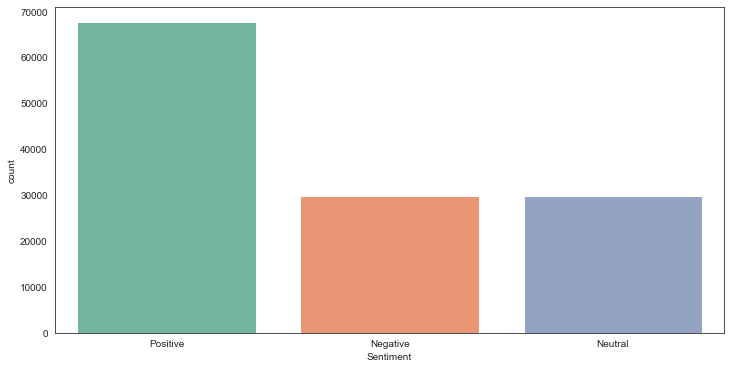

In [44]:
plt.figure(figsize=(12,6))
sns.countplot(x='Sentiment',data=df)

In [48]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

Positive world cloud

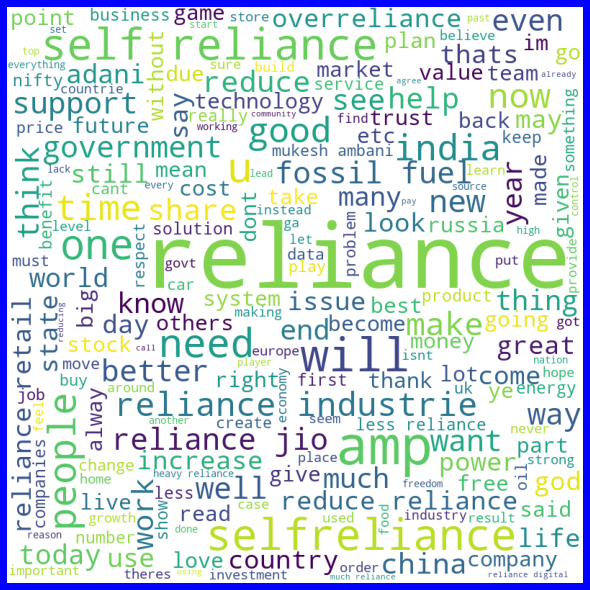

In [50]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
df_positive = df[df["Sentiment"]== "Positive"] 
# iterate through the csv file 
for val in df_positive.tweet: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = "blue") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

NEgative word cloud

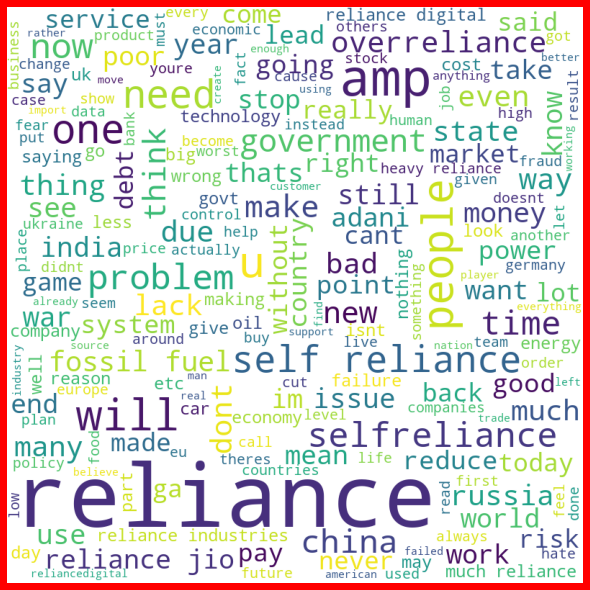

In [51]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
df_negative = df[df["Sentiment"]== "Negative"] 
# iterate through the csv file 
for val in df_negative.tweet: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = "red") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [52]:
df

,Datetime,Tweet Id,tweet,Username,clean_tweet,description_lengths,scores,compound,Sentiment
0,2022-12-30 23:55:21+00:00,1608975056369233920,anfieldedition performances like this are beco...,Ed11Ram,anfieldedition performance like becoming much ...,13,"{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp...",0.3612,Positive
1,2022-12-30 23:47:51+00:00,1608973168231993344,kcchemguy derek_wolfe95 but in certain situati...,Chaz_Mattson,kcchemguy derek wolfe95 certain situation shan...,32,"{'neg': 0.062, 'neu': 0.812, 'pos': 0.126, 'co...",0.3182,Positive
2,2022-12-30 23:47:19+00:00,1608973034144272386,ettingermentum i think social alienation is le...,ChrisD2003,ettingermentum think social alienation le prob...,12,"{'neg': 0.455, 'neu': 0.545, 'pos': 0.0, 'comp...",-0.7579,Negative
3,2022-12-30 23:47:12+00:00,1608973004930945026,lbc aliciakearns the only vegans i know do it ...,CoderScribe,lbc aliciakearns vegan know significantly redu...,22,"{'neg': 0.262, 'neu': 0.738, 'pos': 0.0, 'comp...",-0.7964,Negative
4,2022-12-30 23:42:42+00:00,1608971872636669953,time is to love reliance is to the end httpstc...,Its_a_BOT,time love reliance end httpstcowcuuxixqsi,5,"{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'comp...",0.6369,Positive
...,...,...,...,...,...,...,...,...,...
40407,2023-02-01 00:07:40+00:00,1620574566233051137,natural gas tight market expected \n\nrelianc...,_Sandeep09,natural gas tight market expected reliance sto...,15,"{'neg': 0.124, 'neu': 0.734, 'pos': 0.141, 'co...",0.0772,Positive
40408,2023-02-01 00:05:47+00:00,1620574095212683266,brisco_0317 proud_2b_blue dpbeachny gorillasty...,deamonomic,brisco 0317 proud 2b blue dpbeachny gorillasty...,36,"{'neg': 0.121, 'neu': 0.746, 'pos': 0.133, 'co...",0.1280,Positive
40409,2023-02-01 00:05:17+00:00,1620573968586657795,aerial perspective of the residential highrise...,Yuaxvii_Studio,aerial perspective residential highrise social...,23,"{'neg': 0.0, 'neu': 0.692, 'pos': 0.308, 'comp...",0.8360,Positive
40410,2023-02-01 00:02:32+00:00,1620573275851223040,2until the imposition of income taxes during w...,DanRDimicco,2until imposition income tax world war tariff ...,27,"{'neg': 0.111, 'neu': 0.655, 'pos': 0.234, 'co...",0.5106,Positive


In [55]:
df.to_csv('processed_data.csv', sep
                  =',', index=False)